## Runs DE on different clusters. 
Does this over each donor and combined

In [1]:
# Input info
# se_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/SE.rds"
# sample_names = "preB,postB"
# outdir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/genes_donors_DE_minPct_00_pval0.1"


se_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/SE.rds"
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0.01_logfc0.1"
sample_names =  "Input,Flt3l" 

top_de = 3 
minPct = 0.01 
logfcthresh = 0.1 
p_thresh = 0.1
to_donors = TRUE

# Parameters
assay="RNA"
#minPct = 0.00
#logfcthresh = 0.1
#top_de = 3
#p_thresh=0.1
# test.use="wilcox"
# latent.vars = "NULL"

# Parallel processing
cores = 4

# R utils script
utils_script <- "/data/Mito_Trace/R_scripts/seurat_utils.R"

#to_donors = TRUE


In [2]:
source(utils_script)
outdir = outdir
dir.create(outdir, showWarnings = FALSE)


Registered S3 method overwritten by 'spatstat.core':
  method          from
  formula.glmmPQL MASS

Attaching SeuratObject

Attaching sp

Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Loading required package: patchwork



In [3]:
sample_names <- unlist(strsplit(sample_names, ",")[[1]])
sample_names

[1] "Input" "Flt3l"

In [4]:
library(GenomicRanges)
library(Seurat)
library(Signac)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(data.table)
library(magrittr)
library(cowplot)
library(metap)
library("RColorBrewer")

library(future)
plan()

plan("multiprocess", workers = cores)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
options(future.globals.maxSize = 8000 * 1024^2)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.1.2”

Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following objects are masked from 

sequential:
- args: function (..., envir = parent.frame())
- tweaked: FALSE
- call: NULL

Warning message:
"Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'."


In [5]:
se <- readRDS(se_f)#file.path(indir, paste0("allSamples.integrated.rds")))
se

An object of class Seurat 
189108 features across 5860 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

## Run DE for  cluster vs all others 

In [6]:
btwnClust.outdir <- file.path(outdir, "btwnClust")
dir.create(btwnClust.outdir)


Warning message in dir.create(btwnClust.outdir):
"'/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0.01_logfc0.1/btwnClust' already exists"


[1] "cluster 0"
               p_val avg_log2FC pct.1 pct.2     p_val_adj
FNDC3B 1.190310e-107  0.6626762 0.924 0.713 2.330032e-103
MPO    1.015389e-106  0.5399541 0.508 0.185 1.987623e-102
LPO     2.830454e-98  0.6406327 0.677 0.362  5.540614e-94
ELANE   6.330861e-69  0.2958814 0.252 0.066  1.239266e-64
PRTN3   3.024057e-65  0.2761368 0.245 0.064  5.919591e-61
PCSK5   5.961728e-48  0.4072578 0.733 0.543  1.167008e-43
[1] "saved cluster 0"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 1"
               p_val avg_log2FC pct.1 pct.2    p_val_adj
NLRP3   3.442673e-51  0.3263441 0.432 0.196 6.739032e-47
ZNF365  1.540492e-43  0.3545059 0.733 0.483 3.015512e-39
GAS7    3.316786e-42  0.3691882 0.854 0.640 6.492609e-38
EPB41L3 4.605490e-41  0.3601557 0.653 0.418 9.015247e-37
MEF2D   2.858798e-40  0.3716066 0.587 0.368 5.596098e-36
CMKLR1  3.909787e-39  0.2590039 0.521 0.283 7.653409e-35
[1] "saved cluster 1"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 2"
               p_val avg_log2FC pct.1 pct.2    p_val_adj
IKZF2   1.050662e-74  0.6724794 0.618 0.307 2.056670e-70
IL1RL1  4.330325e-66  0.3910194 0.354 0.109 8.476611e-62
IL18R1  1.704778e-59  0.4625617 0.454 0.188 3.337102e-55
CLC     3.083311e-49  0.2103626 0.132 0.020 6.035581e-45
KLRB1   8.812571e-48  0.1483190 0.119 0.017 1.725061e-43
ST3GAL4 3.945509e-42  0.4980693 0.623 0.407 7.723334e-38
[1] "saved cluster 2"


Warning message:
"Only one identity present, the expression values will be not scaled"
The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 3"
              p_val avg_log2FC pct.1 pct.2    p_val_adj
CDK6   3.202414e-27  0.4761213 0.791 0.719 6.268726e-23
ETV6   1.240137e-15  0.2993274 0.831 0.785 2.427568e-11
MTHFR  8.210759e-14 -0.1727981 0.142 0.309 1.607256e-09
FAR2   1.000882e-13  0.3810716 0.583 0.531 1.959227e-09
SORL1  1.174016e-13  0.2581949 0.628 0.544 2.298137e-09
OSBPL5 1.242532e-13 -0.1849510 0.191 0.373 2.432257e-09
[1] "saved cluster 3"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 4"
                 p_val avg_log2FC pct.1 pct.2     p_val_adj
ZFPM1    2.795820e-127  0.8035915 0.864 0.423 5.472818e-123
ABCC4     6.896161e-95  0.6776478 0.902 0.557  1.349924e-90
C1orf116  6.082524e-76  0.2855876 0.358 0.090  1.190654e-71
IL9R      4.700729e-74  0.3581119 0.443 0.136  9.201677e-70
SOS1      1.673864e-70  0.4673601 0.708 0.346  3.276589e-66
ST8SIA6   2.929317e-68  0.4706756 0.715 0.340  5.734138e-64
[1] "saved cluster 4"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 5"
                 p_val avg_log2FC pct.1 pct.2    p_val_adj
VCAN      9.379602e-93  0.5601285 0.577 0.207 1.836057e-88
MARCO     7.416386e-75  0.4160663 0.480 0.160 1.451758e-70
ARHGEF10L 3.415816e-62  0.4693504 0.677 0.343 6.686460e-58
FPR3      4.862692e-58  0.3449315 0.427 0.152 9.518720e-54
ZNF365    4.565553e-57  0.5294250 0.787 0.487 8.937070e-53
EPB41L3   9.664214e-55  0.4880991 0.736 0.419 1.891770e-50
[1] "saved cluster 5"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 6"
                 p_val avg_log2FC pct.1 pct.2     p_val_adj
HBB      2.087208e-124  0.2902585 0.212 0.014 4.085711e-120
DNAJC6   1.144514e-107  0.8168219 0.756 0.324 2.240386e-103
ZFPM1     1.290441e-65  0.7067024 0.749 0.440  2.526039e-61
ST8SIA6   5.239162e-54  0.5691433 0.654 0.352  1.025566e-49
CMBL      5.386598e-50  0.4323804 0.406 0.149  1.054427e-45
SLC22A23  2.234537e-47  0.5565392 0.664 0.393  4.374106e-43
[1] "saved cluster 6"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 7"
                     p_val avg_log2FC pct.1 pct.2    p_val_adj
CTC-432M15.3  8.546769e-47 -0.3705965 0.171 0.733 1.673030e-42
ST3GAL1       1.543237e-46 -0.3476755 0.126 0.652 3.020887e-42
FBXO16        6.293566e-46 -0.3920607 0.114 0.623 1.231966e-41
RTN4          9.274620e-46 -0.3656133 0.117 0.631 1.815507e-41
TCF4          4.942562e-45 -0.2164204 0.123 0.636 9.675065e-41
RP11-326L24.9 8.144194e-45 -0.3241004 0.108 0.606 1.594226e-40
[1] "saved cluster 7"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 8"
               p_val avg_log2FC pct.1 pct.2    p_val_adj
KCNQ3   6.775732e-64  0.7730204 0.715 0.336 1.326350e-59
ATP10A  4.868947e-52  0.6945536 0.757 0.437 9.530965e-48
ASB2    1.212709e-42  0.5542109 0.667 0.359 2.373878e-38
C2orf91 3.907153e-35  0.2753026 0.228 0.057 7.648252e-31
DUSP22  6.941362e-34  0.5598410 0.655 0.381 1.358772e-29
CMKLR1  1.569552e-32  0.4297564 0.568 0.297 3.072399e-28
[1] "saved cluster 8"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 9"
                  p_val avg_log2FC pct.1 pct.2     p_val_adj
WNT10A    4.092548e-136  0.3518822 0.685 0.127 8.011163e-132
KRTAP16-1 3.162224e-124  0.2369184 0.401 0.048 6.190054e-120
GRASP     1.583733e-118  0.2761718 0.565 0.098 3.100158e-114
HEMGN     2.597249e-110  0.2214888 0.527 0.090 5.084115e-106
ITM2C     1.568809e-106  0.3529820 0.700 0.159 3.070943e-102
DUSP1     4.001800e-105  0.4134837 0.754 0.191 7.833523e-101
[1] "saved cluster 9"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 10"
              p_val avg_log2FC pct.1 pct.2    p_val_adj
CHST11 2.453866e-27 -0.6758723 0.581 0.856 4.803442e-23
ATP8B4 1.429197e-26 -0.6974844 0.338 0.685 2.797653e-22
GNAQ   8.340977e-26 -0.6764833 0.450 0.755 1.632746e-21
MSI2   1.406362e-20 -0.5598659 0.518 0.810 2.752954e-16
ETV6   2.976370e-20 -0.5370178 0.500 0.801 5.826245e-16
AKAP13 1.538874e-19 -0.5374614 0.500 0.759 3.012346e-15
[1] "saved cluster 10"


Warning message:
"Only one identity present, the expression values will be not scaled"
The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 11"
              p_val avg_log2FC pct.1 pct.2    p_val_adj
LPO    1.024545e-20  0.4231767 0.677 0.395 2.005546e-16
FNDC3B 3.846022e-18  0.3800327 0.945 0.735 7.528587e-14
WDR88  4.997273e-17  0.2990460 0.400 0.184 9.782163e-13
RAD23A 1.184085e-16  0.3396480 0.450 0.222 2.317847e-12
PSMB7  3.294516e-16  0.2599710 0.564 0.308 6.449015e-12
RNASE2 1.153984e-15  0.1835384 0.232 0.079 2.258923e-11
[1] "saved cluster 11"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 12"
              p_val avg_log2FC pct.1 pct.2    p_val_adj
STK10  1.076616e-27 -0.7204601 0.130 0.710 2.107477e-23
GAB2   2.886393e-25 -0.5889578 0.092 0.635 5.650114e-21
DOCK10 1.275974e-24 -0.7503545 0.099 0.637 2.497720e-20
NFE2L2 2.106053e-24 -0.5382714 0.084 0.610 4.122598e-20
RREB1  3.869871e-23 -0.5257777 0.130 0.684 7.575273e-19
XYLT1  1.597524e-22 -0.4259598 0.191 0.786 3.127154e-18
[1] "saved cluster 12"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 13"
               p_val avg_log2FC pct.1 pct.2    p_val_adj
NCR2    6.868028e-37  0.4527699 0.432 0.063 1.344417e-32
TNFRSF4 5.018616e-33  0.3257719 0.351 0.046 9.823940e-29
GP5     5.237421e-24  0.2568595 0.365 0.065 1.025225e-19
MS4A12  1.788599e-23  0.1383564 0.243 0.031 3.501183e-19
RBM38   6.304383e-21  0.5613118 0.622 0.202 1.234083e-16
RTP5    1.132700e-20  0.1792129 0.243 0.035 2.217260e-16
[1] "saved cluster 13"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster 14"
                p_val avg_log2FC pct.1 pct.2     p_val_adj
FAM163B 2.112444e-116  0.6147246 0.600 0.035 4.135110e-112
HMHB1    3.286168e-95  0.3737810 0.415 0.020  6.432674e-91
ALDH3B2  2.461527e-80  0.4297519 0.523 0.038  4.818439e-76
VPREB1   2.449067e-74  0.3115180 0.400 0.024  4.794048e-70
CD79A    4.189642e-73  0.4437837 0.569 0.050  8.201224e-69
LRRC14B  2.065329e-62  0.2615718 0.369 0.024  4.042882e-58
[1] "saved cluster 14"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



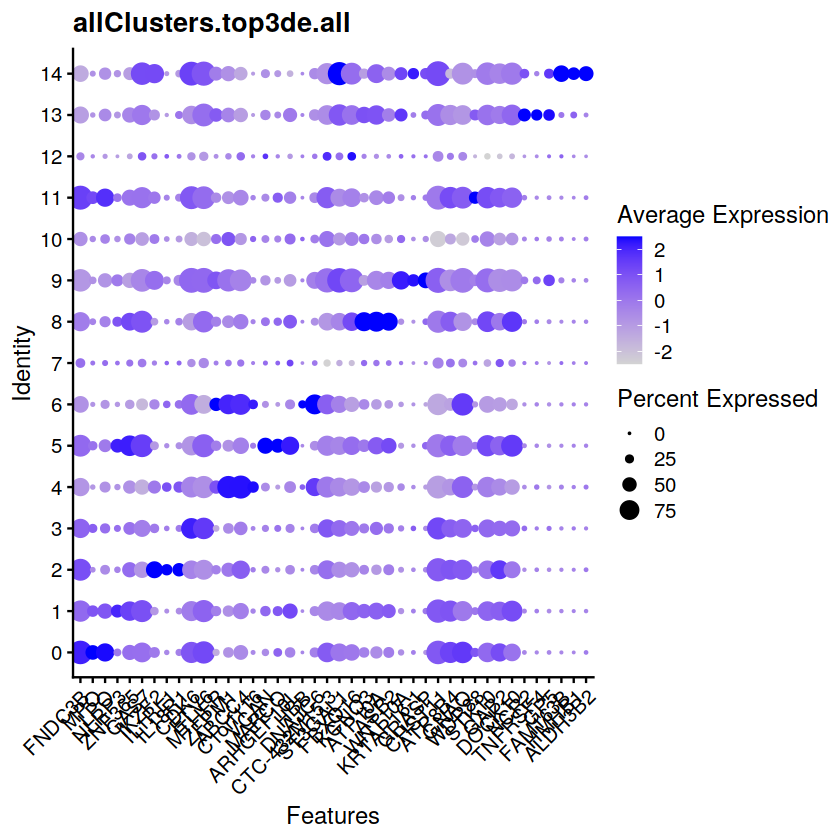

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



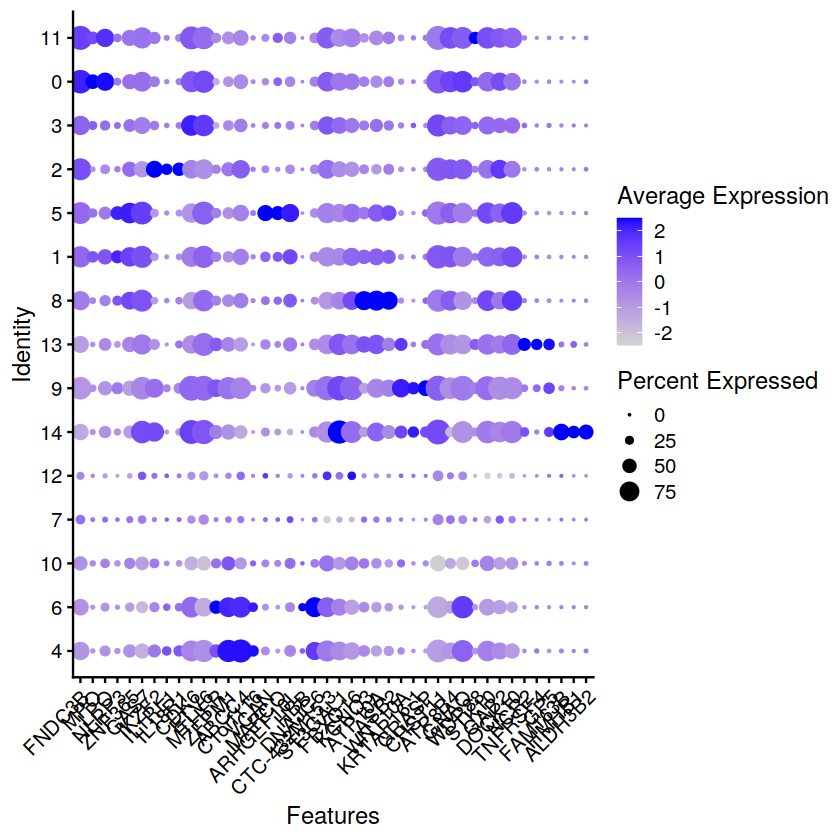

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



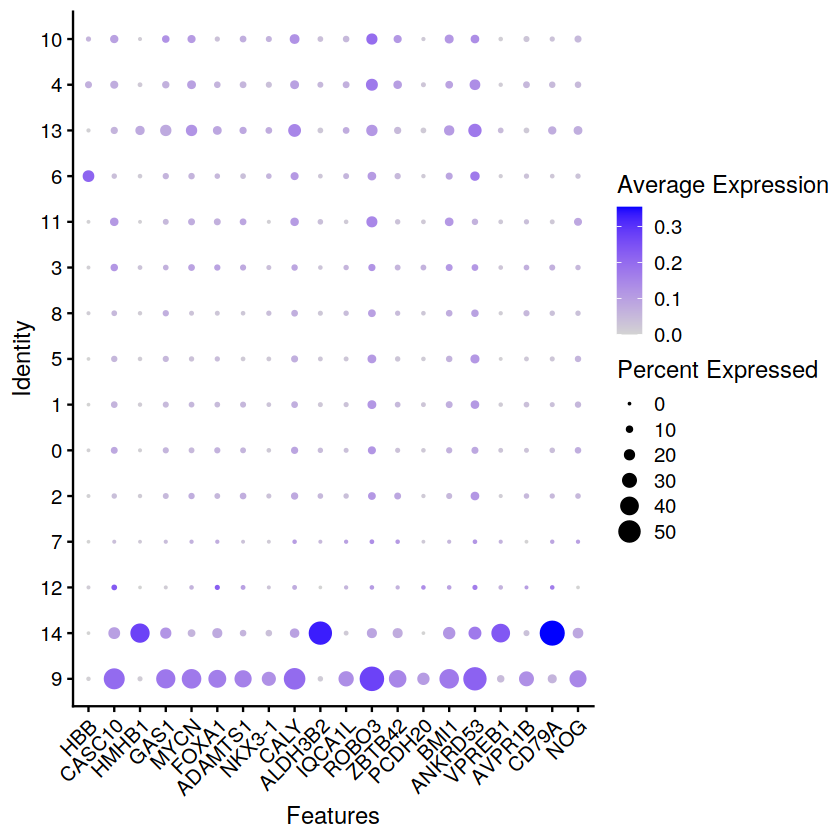

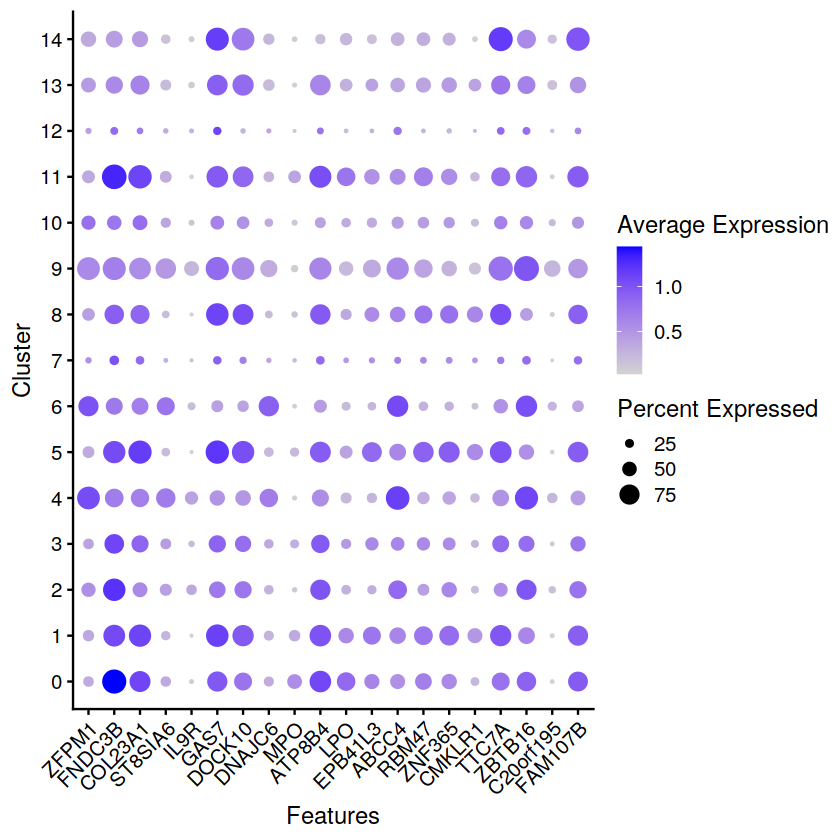

In [7]:
curr.outdir <- btwnClust.outdir

cluster.ids <- sort(unique(se$seurat_clusters))
Idents(se) <- se$seurat_clusters

all.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                          row.names=row.names(se))
all.names.sig <- c()
for (id1 in cluster.ids){ #or however many clusters you have
try({
    print(paste("cluster", id1))
    response <- FindMarkers(
                  object = se,
                  ident.1 = id1, #"CD4 Naive",
                  min.pct = minPct, logfc.threshold=logfcthresh,
                  test.use = 'wilcox', latent.vars = NULL
                )
    print(head(response))
    #write.csv(response, file=file.path(clust_outdir, paste0("cluster_",i,"vsAll.DE.csv")))
    
    
    print(paste('saved cluster', id1))
    response <- response %>% dplyr::arrange(p_val)
    response$p_val_adj_BH <- stats::p.adjust(response$p_val, method = "BH", n = length(response$p_val))    
    write.csv(response,
              file=file.path(curr.outdir, paste0("cluster",id1,".DE.csv")), quote=F)
    
    curr.sig <- response %>% dplyr::filter(p_val_adj_BH<p_thresh)
    
    
    names.sig <- rownames(curr.sig)
    se.filt <- subset(se, seurat_clusters == id1)
    
    # Add to all pvals
    all.names.sig <- c(all.names.sig, head(names.sig, top_de))
    all.pvals[names.sig,id1] <- curr.sig$p_val_adj_BH
    de.plots(se.filt, names.sig, curr.outdir, curr.name=id1, max.size=10, to.heat=T,to.vln=T)
    
})
}


all.names.sig <- unique(all.names.sig)
#de.plots(se, all.names.sig, curr.outdir, curr.name="allClusters.top3de", max.size=15)
de.plots(se, all.names.sig, curr.outdir, curr.name="allClusters.top3de.all", max.size=length(all.names.sig))


dot <- DotPlot(se, scale=T,
               features = all.names.sig, #head(all.names.sig, 20), 
               cluster.idents=T) + RotatedAxis()
dot
ggsave(file.path(curr.outdir, "allClusters.top3de.all.png"))
ggsave(file.path(curr.outdir, "allClusters.top3de.all.pdf"))

## b) averaged top p-values (only average ones that were DE)

sig.all.ordered <- sort(rowMeans(-log10(all.pvals),na.rm=T), decreasing=T)
dot <- DotPlot(se, scale=F,
               features = names(head(sig.all.ordered,20)), 
               cluster.idents=T) + RotatedAxis()
dot
ggsave(file.path(curr.outdir, "allClusters.pvalsOrdered.scaleF.png"))
ggsave(file.path(curr.outdir, "allClusters.pvalsOrdered.scaleF.pdf"))
#de.plots(se, names(sig.all.ordered), outdir, curr.name="allDonors.allClusters.pvalsOrdered", max.size=20)



all.pvals.nafill <- all.pvals
all.pvals.nafill[,] <- -log10(zoo::na.fill(all.pvals,1))

sig.all.ordered <- sort(rowMeans(all.pvals.nafill), decreasing=T)
dot <- DotPlot(se, scale=F,
               features = head(names(sig.all.ordered),20), 
               cluster.idents=F) + RotatedAxis() + ylab("Cluster")
ggsave(file.path(btwnClust.outdir,
                 "allClusters.ovalsOrderedNA.scaleF.png"))
ggsave(file.path(btwnClust.outdir,
                 "allClusters.ovalsOrderedNA.scaleF.pdf"))
dot

In [8]:
btwn_embeddings <- file.path(btwnClust.outdir, "embeddings")
dir.create(btwn_embeddings)


featplot <- function(name.sig, se, curr.outdir){
    feat <- FeaturePlot(se,  features=name.sig)
    ggsave(plot=feat,
           file=file.path(curr.outdir, paste0(name.sig,".embedFeat.top.png")))
    }

sapply(all.names.sig, FUN=featplot, se=se, curr.outdir=btwn_embeddings)

Warning message in dir.create(btwn_embeddings):
"'/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0.01_logfc0.1/btwnClust/embeddings' already exists"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67

FNDC3B 
      "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0.01_logfc0.1/btwnClust/embeddings/FNDC3B.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                                                                                            MPO 
         "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0.01_logfc0.1/btwnClust/embeddings/MPO.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                                                                                            LPO 
         "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0.01_logfc0.1/btwnClust/embeddings/LPO.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                                                                                          NLRP3 
       "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0.01_logfc0.1/btwnClust/embeddings/NLRP3.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                                                                                         ZNF365 
      "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0.01_logfc0.1/btwnClust/embeddings/ZNF365.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                                                                                           GAS7 
        "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/

---

---

---

# Run cluster vs all for each donor

In [13]:
if(to_donors){
    source("/data/Mito_Trace/R_scripts/plot_de_over_all.R")

    btwnClust.sepDons.outdir <- file.path(outdir, "btwnClust_sepDons")
    dir.create(btwnClust.sepDons.outdir)
    curr.outdir <- btwnClust.sepDons.outdir

    # Setup Idents to include the condition, clusters and donor
    se$clust_donor <- as.factor(apply(se[[]][ , c( "seurat_clusters", "donor") ] , 1 , paste , collapse = "_" ))
    Idents(se) <- se$clust_donor
    don.ids <- levels(se$donor)
    cluster.ids <- sort(unique(se$seurat_clusters))

    all.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                              row.names=row.names(se))
    all.names.sig <- c()

    for (clust in cluster.ids){ #or however many clusters you have
        clust.names.sig <- c()
        print("cluster")
        print(clust)
        clust.pvals <- data.frame(matrix(nrow=dim(se)[1],ncol=0),
                                  row.names=row.names(se))
        clust.outdir <- file.path(curr.outdir, paste0("clust", clust))
        dir.create(clust.outdir)
        for (don in don.ids){
            try({
                if (clust == "None" | don == "None"){
                    print("clust or don is none")
                    next
                }
                id1 = paste0(clust, "_", don)
                print("ID1")
                print(id1)
                response <- FindMarkers(
                              object = se,
                              ident.1 = id1, #"CD4 Naive",
                              min.pct = minPct,
                              test.use = 'wilcox', latent.vars = NULL
                            )

                #write.csv(response, file=file.path(clust_outdir, paste0("cluster_",i,"vsAll.DE.csv")))
                response <- response %>% dplyr::arrange(p_val)
                response$p_val_adj_BH <- stats::p.adjust(response$p_val, method = "BH", n = length(response$p_val))    
                print(head(response))
                write.csv(response,
                          file=file.path(clust.outdir, paste0("clust",clust,"donor", don, ".DE.csv")), quote=F)

                curr.sig <- response %>% dplyr::filter(p_val_adj_BH<p_thresh)
                names.sig <- rownames(curr.sig)
                se.filt <- subset(se, idents = id1)
                de.plots(se.filt, names.sig, clust.outdir, curr.name=id1, max.size=10, to.heat=T,to.vln=T)

                # Add to all pvals
                all.names.sig <- c(all.names.sig, head(names.sig, top_de))
                all.pvals[names.sig,id1] <- curr.sig$p_val_adj_BH
                clust.names.sig <- c(clust.names.sig, head(names.sig, top_de))
                clust.pvals[names.sig, don] <- curr.sig$p_val_adj_BH
            })
        }
        if (clust != "None"){
            se.filt <- subset(se, subset = seurat_clusters == clust & donor != "None")
            Idents(se.filt) <- se.filt$donor
            tryCatch(wrap.plot.over.all(se.filt, clust.outdir, clust.pvals, clust.names.sig, 
                                        name=paste0("cluster",clust,"topDonorDE.split_donors")),
                     error = function(e) print(e))
            }
    }
    
    tryCatch(wrap.plot.over.all(se, curr.outdir, all.pvals, all.names.sig, name="allClusters"),
             error = function(e) print(e))
}


# all.names.sig <- unique(all.names.sig)
# de.plots(se, all.names.sig, curr.outdir, curr.name="combinedDonors.allClusters", max.size=15)

# dot <- DotPlot(se, scale=FALSE,
#                features = head(all.names.sig,20), 
#                cluster.idents=T) + RotatedAxis()
# dot
# ggsave(file.path(curr.outdir, "combinedDonors.allClusters.top3de.png"))
# ggsave(file.path(curr.outdir, "combinedDonors.allClusters.top3de.pdf"))

# ## b) averaged top p-values (only average ones that were DE)

# sig.all.ordered <- sort(rowMeans(-log10(all.pvals),na.rm=T), decreasing=T)
# dot <- DotPlot(se, scale=F,
#                features = names(head(sig.all.ordered,20)), 
#                cluster.idents=T) + RotatedAxis()
# dot
# ggsave(file.path(curr.outdir, "combinedDonors.allClusters.pvalsOrdered.scaleF.png"))
# ggsave(file.path(curr.outdir, "combinedDonors.allClusters.pvalsOrdered.scaleF.pdf"))
# #de.plots(se, names(sig.all.ordered), outdir, curr.name="allDonors.allClusters.pvalsOrdered", max.size=20)



# all.pvals.nafill <- all.pvals
# all.pvals.nafill[,] <- -log10(zoo::na.fill(all.pvals,1))

# sig.all.ordered <- sort(rowMeans(all.pvals.nafill), decreasing=T)
# dot <- DotPlot(se, scale=F,
#                features = head(names(sig.all.ordered),20), 
#                cluster.idents=F) + RotatedAxis() + ylab("Cluster")
    
# ggsave(file.path(btwnClust.sepDons.outdir,
#                  "combinedDonors.allClusters.ovalsOrderedNA.scaleF.png"))
# ggsave(file.path(btwnClust.sepDons.outdir,
#                  "combinedDonors.allClusters.ovalsOrderedNA.scaleF.pdf"))
# dot

Warning message in dir.create(btwnClust.sepDons.outdir):
"'/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0.01_logfc0.1/btwnClust_sepDons' already exists"


[1] "cluster"
[1] "0"


Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0.01_logfc0.1/btwnClust_sepDons/clust0' already exists"


[1] "ID1"
[1] "0_0"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
LPO     3.538114e-25  0.6115166 0.699 0.396 6.925858e-21 1.273721e-23
FNDC3B  3.305376e-23  0.5704023 0.941 0.736 6.470274e-19 5.949677e-22
MPO     6.130893e-18  0.4327018 0.468 0.222 1.200122e-13 7.357072e-17
PIWIL4  2.775507e-14  0.3689979 0.591 0.362 5.433055e-10 2.497957e-13
ANKRD7  6.972155e-11  0.2744932 0.522 0.320 1.364799e-06 4.740507e-10
FAM107B 7.900845e-11  0.3520606 0.796 0.602 1.546590e-06 4.740507e-10


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "0_1"
                      p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
TAS2R8         2.342041e-33  0.2580226  0.25 0.002 4.584545e-29 1.006843e-29
TAS2R9         5.792462e-26  0.2576130  0.25 0.002 1.133874e-21 1.245090e-22
RP11-1212A22.4 3.791694e-18  0.2562412  0.25 0.003 7.422241e-14 5.433497e-15
GAGE1          7.771388e-16  0.2556411  0.25 0.004 1.521249e-11 8.352299e-13
TAS2R40        2.475199e-11  0.5974886  0.75 0.046 4.845202e-07 2.128176e-08
NPPB           5.362068e-11  0.4415462  0.50 0.022 1.049625e-06 3.841922e-08


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "0_2"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "0_3"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 0_3
[1] "ID1"
[1] "0_4"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "clust or don is none"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two d

[1] "cluster"
[1] "1"


Warning message in dir.create(clust.outdir):
"'/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_hg38_1_2/annotation_clones/de_btwnclust_RNA/minPct_0.01_logfc0.1/btwnClust_sepDons/clust1' already exists"


[1] "ID1"
[1] "1_0"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
ZNF365  2.602425e-16  0.3952690 0.833 0.506 5.094247e-12 1.014946e-14
GLT1D1  9.954367e-16  0.2755565 0.527 0.240 1.948567e-11 1.941102e-14
CMKLR1  2.995340e-14  0.2810116 0.607 0.305 5.863379e-10 3.893943e-13
EPB41L3 4.939318e-14  0.3809788 0.740 0.440 9.668716e-10 4.815835e-13
POR     1.990111e-12  0.2636446 0.627 0.345 3.895641e-08 1.552286e-11
SLC29A3 4.037955e-12  0.3112827 0.593 0.327 7.904297e-08 2.624671e-11


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "1_1"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 1_1
[1] "ID1"
[1] "1_2"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 1_2
[1] "ID1"
[1] "1_3"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 1_3
[1] "ID1"
[1] "1_4"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 1_4
[1] "clust or don is none"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



<simpleError in hclust(d = dist(x = mat)): must have n >= 2 objects to cluster>
[1] "cluster"
[1] "2"
[1] "ID1"
[1] "2_0"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
IL18R1  5.553471e-19  0.4841325 0.554 0.208 1.087092e-14 5.280647e-17
CLEC4A  1.077683e-18  0.3251197 0.297 0.070 2.109564e-14 5.280647e-17
IL1RL1  6.316743e-17  0.3915108 0.406 0.128 1.236502e-12 2.063469e-15
FAM135B 2.182484e-12  0.5927241 0.733 0.451 4.272213e-08 5.347086e-11
IKZF2   9.079663e-11  0.4077749 0.604 0.333 1.777344e-06 1.779614e-09
UQCRC2  7.913077e-10  0.2922415 0.406 0.182 1.548985e-05 1.275633e-08


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "2_1"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
SI      6.278809e-15  0.4372611 0.667 0.039 1.229077e-10 1.432196e-11
SLURP1  2.831048e-13  0.3089400 0.333 0.011 5.541777e-09 3.228811e-10
APOBEC2 1.206084e-10  0.6500255 0.833 0.086 2.360909e-06 9.170259e-08
ZNF629  7.869028e-10  0.2541359 0.667 0.057 1.540362e-05 4.487313e-07
SLC17A3 4.627757e-09  0.3769593 0.833 0.093 9.058834e-05 1.998057e-06
DMRT3   5.255740e-09  0.2892359 0.500 0.037 1.028811e-04 1.998057e-06


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "2_2"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
PCDHB10 2.748085e-19  0.2915879 0.222 0.005 5.379377e-15 6.779527e-16
OOSP2   9.053301e-19  0.2855179 0.222 0.005 1.772184e-14 1.116725e-15
SMIM21  7.013448e-12  0.3161768 0.333 0.019 1.372882e-07 5.767392e-09
HOXC13  1.965750e-11  0.3907748 0.333 0.020 3.847955e-07 1.212376e-08
PFN4    1.643579e-08  0.5240326 0.667 0.100 3.217307e-04 8.109420e-06
NDUFAF7 3.067184e-08  0.5405567 0.778 0.137 6.004013e-04 1.155975e-05


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "2_3"
                 p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
MTRNR2L13 1.320974e-52  0.2787296   0.2 0.001 2.585806e-48 5.871729e-49
CDRT15    1.071920e-22  0.2772454   0.2 0.002 2.098283e-18 2.382342e-19
GPR42     1.786233e-13  0.2862048   0.2 0.003 3.496550e-09 2.646601e-10
SPEM1     1.692642e-11  0.2723901   0.2 0.004 3.313347e-07 1.880949e-08
SPANXN2   9.906984e-11  0.2730685   0.2 0.004 1.939292e-06 7.561612e-08
C4A       1.020690e-10  0.2835488   0.2 0.004 1.998001e-06 7.561612e-08


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "2_4"
                p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
CCDC54   3.596522e-18  0.3226409  0.25 0.003 7.040192e-14 1.570242e-14
DDX53    1.394269e-16  0.3890128  0.25 0.003 2.729282e-12 3.043690e-13
RSPH10B2 3.855086e-15  0.2792997  0.50 0.015 7.546331e-11 5.610436e-12
CRYGA    2.663408e-12  0.3185390  0.25 0.005 5.213620e-08 2.907109e-09
TMEM249  4.625393e-10  0.6192450  0.50 0.024 9.054207e-06 3.436764e-07
C2orf16  5.133511e-10  0.7211494  0.75 0.054 1.004885e-05 3.436764e-07


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "clust or don is none"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster"
[1] "3"
[1] "ID1"
[1] "3_0"
               p_val avg_log2FC pct.1 pct.2   p_val_adj p_val_adj_BH
CDK6    6.590490e-08  0.4735024 0.825 0.724 0.001290088 6.392775e-06
UTY     6.920010e-07 -0.2862706 0.000 0.196 0.013545920 2.575958e-05
ANKRD27 7.966882e-07 -0.3362985 0.107 0.352 0.015595171 2.575958e-05
LMTK3   2.078435e-06 -0.3749416 0.175 0.415 0.040685368 4.475741e-05
PIK3R1  2.307083e-06  0.4025105 0.583 0.443 0.045161154 4.475741e-05
BTBD11  3.807377e-06  0.3891879 0.709 0.576 0.074529406 6.155260e-05


Warning message:
"Only one identity present, the expression values will be not scaled"
Warning message in FeaturePlot(se.filt, features = names.sig):
"All cells have the same value (0) of UTY."
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
"All cells have the same value of UTY."
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "3_1"
                     p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
PCDH20        6.197316e-11  0.2940672   0.6 0.037 1.213125e-06 2.629521e-07
AC114783.1    2.030816e-10  0.4745065   0.2 0.005 3.975323e-06 3.536584e-07
MMP23B        2.500531e-10  0.4586372   0.6 0.040 4.894789e-06 3.536584e-07
RP11-310K10.1 4.817226e-09  0.2843852   0.6 0.044 9.429720e-05 5.109873e-06
OR10G4        1.467680e-08  0.5539803   0.2 0.006 2.872985e-04 1.004767e-05
MAGEE2        1.545969e-08  0.3373583   0.2 0.006 3.026234e-04 1.004767e-05


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "3_2"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "3_3"
                  p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
C5orf38    1.645686e-31  0.4379029 1.000 0.020 3.221430e-27 5.955738e-28
C11orf86   1.568392e-23  0.3092920 0.667 0.012 3.070127e-19 2.838005e-20
AKR7A3     1.762444e-19  0.4215198 1.000 0.034 3.449984e-15 2.126095e-16
IFITM1     3.731439e-16  0.4141158 1.000 0.041 7.304291e-12 3.376019e-13
C1GALT1C1L 8.648768e-14  0.2907259 0.667 0.022 1.692996e-09 6.259979e-11
IRX2       4.971343e-13  0.2982936 0.667 0.023 9.731403e-09 2.998548e-10


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "3_4"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "clust or don is none"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two d

[1] "cluster"
[1] "4"
[1] "ID1"
[1] "4_0"
                p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
SPDYC    3.663933e-21  0.2521790 0.293 0.052 7.172150e-17 7.547703e-19
ZFPM1    1.147548e-19  0.7668027 0.866 0.458 2.246325e-15 1.181974e-17
LONRF2   4.743638e-15  0.3723001 0.476 0.158 9.285671e-11 3.257298e-13
ST8SIA6  2.825727e-14  0.5172960 0.744 0.369 5.531360e-10 1.455249e-12
NSMCE1   2.494920e-13  0.4283936 0.744 0.368 4.883805e-09 1.027907e-11
C1orf116 3.332504e-13  0.2981193 0.366 0.111 6.523377e-09 1.144160e-11


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "4_1"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "4_2"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "4_3"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 4_3
[1] "ID1"
[1] "4_4"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
SNAI2   5.738036e-14  0.3664728  0.75 0.036 1.123220e-09 1.545253e-10
TTC9B   1.111258e-12  0.2971514  0.75 0.039 2.175288e-08 1.496310e-09
ENPP5   1.931701e-12  0.2910239  0.75 0.040 3.781305e-08 1.606091e-09
OR2L3   2.780299e-12  0.2855486  0.50 0.019 5.442435e-08 1.606091e-09
FOXE1   2.981974e-12  0.4016682  0.75 0.041 5.837214e-08 1.606091e-09
PPP1R26 7.461882e-12  0.3559794  0.75 0.042 1.460663e-07 3.349142e-09


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "clust or don is none"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster"
[1] "5"
[1] "ID1"
[1] "5_0"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
MARCO   4.988495e-24  0.4313422 0.571 0.182 9.764980e-20 8.330787e-22
VCAN    8.733729e-20  0.4846358 0.600 0.234 1.709627e-15 7.292664e-18
S100A9  3.053961e-19  0.2500046 0.276 0.059 5.978129e-15 1.667329e-17
FPR3    3.993601e-19  0.3663290 0.505 0.170 7.817475e-15 1.667329e-17
S100A10 1.074263e-17  0.3167036 0.438 0.145 2.102870e-13 3.588039e-16
LILRB4  1.718914e-17  0.2874941 0.333 0.090 3.364775e-13 4.784312e-16


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "5_1"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "5_2"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 5_2
[1] "ID1"
[1] "5_3"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "5_4"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 5_4
[1] "clust or don is none"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two d

[1] "cluster"
[1] "6"
[1] "ID1"
[1] "6_0"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
HBB     5.353439e-28  0.2518168 0.220 0.026 1.047936e-23 2.837322e-25
DNAJC6  7.280599e-26  0.7198265 0.802 0.349 1.425177e-21 1.929359e-23
ZFPM1   6.103958e-16  0.7617023 0.736 0.459 1.194850e-11 1.078366e-13
EFCAB12 1.018259e-15  0.4807662 0.505 0.193 1.993241e-11 1.349193e-13
AMMECR1 2.558174e-15  0.6123715 0.659 0.338 5.007625e-11 2.711664e-13
ST8SIA6 1.491293e-14  0.6299016 0.681 0.369 2.919206e-10 1.317309e-12


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "6_1"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 6_1
[1] "ID1"
[1] "6_2"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 6_2
[1] "ID1"
[1] "6_3"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 6_3
[1] "ID1"
[1] "6_4"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 6_4
[1] "clust or don is none"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



<simpleError in hclust(d = dist(x = mat)): must have n >= 2 objects to cluster>
[1] "cluster"
[1] "7"
[1] "ID1"
[1] "7_0"
              p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
C4A    3.110996e-17   1.182971 0.333 0.004 6.089775e-13 2.688523e-13
OPN1LW 1.188673e-15   1.285781 0.333 0.005 2.326828e-11 5.136257e-12
OR4D10 5.614207e-08   1.174301 0.333 0.011 1.098981e-03 1.617266e-04
A4GNT  8.785950e-08   1.835352 0.667 0.046 1.719850e-03 1.898204e-04
NXNL1  2.628548e-07   1.178054 0.333 0.012 5.145384e-03 4.543183e-04
KRT32  1.319256e-06   1.173005 0.333 0.013 2.582443e-02 1.900168e-03


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "7_1"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 7_1
[1] "ID1"
[1] "7_2"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 7_2
[1] "ID1"
[1] "7_3"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 7_3
[1] "ID1"
[1] "7_4"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 7_4
[1] "clust or don is none"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



<simpleError in hclust(d = dist(x = mat)): must have n >= 2 objects to cluster>
[1] "cluster"
[1] "8"
[1] "ID1"
[1] "8_0"
              p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
KCNQ3  5.155157e-18  0.7563261 0.810 0.352 1.009122e-13 1.391892e-15
ASB2   4.313811e-16  0.6676956 0.794 0.372 8.444286e-12 5.823645e-14
FGF6   9.256343e-12  0.2693998 0.317 0.080 1.811929e-07 8.330708e-10
DUSP22 2.945251e-11  0.7007936 0.730 0.393 5.765329e-07 1.988045e-09
CCR6   9.958882e-11  0.2754972 0.302 0.080 1.949451e-06 5.377796e-09
LRRK1  1.899631e-09  0.4435623 0.778 0.443 3.718528e-05 7.362216e-08


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "8_1"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 8_1
[1] "ID1"
[1] "8_2"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 8_2
[1] "ID1"
[1] "8_3"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 8_3
[1] "ID1"
[1] "8_4"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 8_4
[1] "clust or don is none"


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



<simpleError in hclust(d = dist(x = mat)): must have n >= 2 objects to cluster>
[1] "cluster"
[1] "9"
[1] "ID1"
[1] "9_0"
                p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
C11orf45 1.005089e-19  0.2885356 0.875 0.061 1.967461e-15 1.434261e-16
AVP      9.494879e-18  0.2510503 0.625 0.036 1.858623e-13 6.774596e-15
HOXB2    5.931867e-14  0.3631312 0.750 0.066 1.161163e-09 2.821591e-11
MMGT1    1.347759e-13  0.4118487 0.875 0.090 2.638239e-09 4.808131e-11
IGFBP6   2.747601e-13  0.4141424 0.875 0.089 5.378428e-09 7.841652e-11
HTR1B    1.275063e-11  0.3590809 0.625 0.057 2.495936e-07 3.032525e-09


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "9_1"
                 p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
KRTAP16-1 6.645888e-60  0.2720165 0.480 0.060 1.300933e-55 3.489091e-57
C17orf107 1.384622e-46  0.2592993 0.598 0.109 2.710398e-42 3.634634e-44
CHRNE     8.159574e-44  0.2619833 0.647 0.130 1.597237e-39 1.427925e-41
SFXN3     1.206818e-43  0.2886794 0.696 0.147 2.362346e-39 1.583949e-41
WNT10A    3.317431e-43  0.3441262 0.676 0.148 6.493871e-39 3.483302e-41
ITM2C     6.746768e-41  0.3881968 0.745 0.178 1.320680e-36 5.903422e-39


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "9_2"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
NAA30   9.152817e-46  0.2919901 0.711 0.128 1.791664e-41 1.358627e-43
FAM86B2 1.069785e-45  0.2720000 0.651 0.109 2.094104e-41 1.358627e-43
FOSB    2.929509e-40  0.5924787 0.928 0.259 5.734514e-36 2.480318e-38
GRASP   7.275948e-38  0.2861473 0.614 0.116 1.424267e-33 4.620227e-36
DUSP1   2.701409e-34  0.4097916 0.819 0.213 5.288009e-30 1.372316e-32
WNT10A  6.060306e-34  0.3055492 0.675 0.150 1.186305e-29 2.565529e-32


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "9_3"
                 p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
KRTAP16-1 5.640413e-25  0.2731662 0.476 0.064 1.104111e-20 1.850056e-22
GRASP     2.752878e-24  0.3208677 0.667 0.119 5.388759e-20 4.514721e-22
SDPR      5.454544e-21  0.2695023 0.643 0.123 1.067727e-16 5.963634e-19
E2F5      2.121134e-20  0.3162259 0.833 0.189 4.152121e-16 1.739330e-18
LHX6      3.206977e-18  0.3043644 0.762 0.182 6.277658e-14 2.103777e-16
GNAI1     6.047638e-18  0.2975582 0.786 0.189 1.183825e-13 3.306042e-16


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "9_4"
                p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
TMEM191B 7.267380e-56  0.2796190 0.561 0.054 1.422590e-51 6.177273e-53
AVPR1B   1.069682e-35  0.2526011 0.456 0.056 2.093902e-31 4.546147e-33
CASC10   1.721139e-29  0.2558571 0.561 0.094 3.369130e-25 4.876561e-27
GBP5     2.708603e-29  0.3762620 0.614 0.114 5.302090e-25 5.755781e-27
PTCHD1   4.112560e-29  0.3321870 0.579 0.102 8.050337e-25 6.991352e-27
HOXB3    4.157308e-27  0.6192394 0.930 0.285 8.137930e-23 5.889519e-25


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "clust or don is none"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster"
[1] "10"
[1] "ID1"
[1] "10_0"
              p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
NKX1-1 1.748436e-09  0.3955222 0.129 0.011 3.422564e-05 4.544186e-06
AFF1   2.187972e-08 -0.9826626 0.194 0.689 4.282955e-04 2.843269e-05
MYH9   6.332789e-07 -0.8288395 0.129 0.616 1.239643e-02 4.286186e-04
ETV6   8.127302e-07 -0.8747744 0.323 0.792 1.590919e-02 4.286186e-04
CERS6  8.847777e-07 -0.7954572 0.194 0.640 1.731952e-02 4.286186e-04
CHST11 1.106610e-06 -0.8823135 0.452 0.848 2.166190e-02 4.286186e-04


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "10_1"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "10_2"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "10_3"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "10_4"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
MAGEA12 4.241618e-28  0.5358799 0.333 0.003 8.302967e-24 3.520967e-24
CSAG1   3.760456e-25  0.5357849 0.333 0.003 7.361093e-21 1.560777e-21
TRIM43B 6.451512e-24  0.9982075 0.333 0.003 1.262884e-19 1.785133e-20
OR14I1  9.613063e-22  0.5338947 0.333 0.003 1.881757e-17 1.994951e-18
OR56B4  7.625359e-21  0.9978209 0.333 0.004 1.492664e-16 1.265962e-17
OR5D3P  3.895050e-16  0.5339320 0.333 0.005 7.624560e-12 5.388802e-13


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "clust or don is none"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two d

[1] "cluster"
[1] "11"
[1] "ID1"
[1] "11_0"
               p_val avg_log2FC pct.1 pct.2     p_val_adj  p_val_adj_BH
PRR20A 8.226469e-108  0.3092312 0.333 0.001 1.610331e-103 2.186595e-104
CRYAA  8.226469e-108  0.3096602 0.333 0.001 1.610331e-103 2.186595e-104
PRR20C  1.560891e-86  0.3089340 0.333 0.001  3.055445e-82  2.765900e-83
OR6K6   5.944734e-37  0.4099434 0.333 0.002  1.163682e-32  7.900551e-34
OR2T8   1.768398e-26  0.3074889 0.333 0.003  3.461639e-22  1.880161e-23
MYH1    3.989685e-20  0.6272230 0.667 0.015  7.809808e-16  3.534861e-17


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "11_1"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 11_1
[1] "ID1"
[1] "11_2"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 11_2
[1] "ID1"
[1] "11_3"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
NUTM2D  5.583604e-56  0.4247003 0.667 0.005 1.092990e-51 2.137962e-52
OR2T10  1.245251e-20  0.4114503 0.667 0.014 2.437579e-16 2.384033e-17
SCGB2A2 3.847175e-15  0.5919164 0.333 0.005 7.530846e-11 4.910278e-12
ACTA1   6.741165e-14  0.4064075 0.667 0.022 1.319583e-09 6.452980e-11
ADAD2   6.072855e-11  0.3756776 0.667 0.029 1.188761e-06 4.650592e-08
HTR3D   1.053794e-10  0.3935689 0.667 0.029 2.062803e-06 6.724965e-08


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "11_4"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 11_4
[1] "clust or don is none"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster"
[1] "12"
[1] "ID1"
[1] "12_0"
              p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
FABP7  1.663114e-18  1.1184871 0.333 0.004 3.255545e-14 6.082838e-15
OR7E24 1.663114e-18  0.8757207 0.333 0.004 3.255545e-14 6.082838e-15
KRT34  5.815890e-14  1.1197693 0.333 0.006 1.138460e-09 1.418108e-10
OR4F6  2.470177e-12  1.1173550 0.333 0.006 4.835372e-08 4.517336e-09
DDT    3.582546e-11  0.3564181 0.333 0.007 7.012834e-07 5.241265e-08
OXCT2  5.621853e-10  0.3557641 0.333 0.008 1.100478e-05 6.853976e-07


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "12_1"
                p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
OR10A6   4.792400e-11  0.6860139 0.333 0.007 9.381123e-07 3.579005e-07
CLDN15   8.730346e-11  3.1838892 1.000 0.076 1.708965e-06 3.579005e-07
KRT27    2.091610e-10  0.6868608 0.333 0.008 4.094326e-06 5.716369e-07
KLRC3    1.446125e-07  0.6856686 0.333 0.011 2.830789e-03 2.964194e-04
C12orf74 3.883036e-07  1.8553051 0.333 0.012 7.601043e-03 6.367403e-04
ZPBP2    2.874464e-06  0.6811517 0.333 0.014 5.626762e-02 3.927954e-03


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "12_2"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "12_3"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 12_3
[1] "ID1"
[1] "12_4"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 12_4
[1] "clust or don is none"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two d

[1] "cluster"
[1] "13"
[1] "ID1"
[1] "13_0"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
LCE3D   1.643046e-15  0.2688603 0.167 0.002 3.216262e-11 4.792764e-12
GPR88   4.840470e-10  0.4449138 0.667 0.058 9.475220e-06 6.819675e-07
KCNJ1   7.013721e-10  0.7121928 1.000 0.137 1.372936e-05 6.819675e-07
TRIM49B 9.620255e-10  0.2662892 0.167 0.004 1.883165e-05 7.015571e-07
KRT2    7.345127e-09  0.3359431 0.500 0.038 1.437809e-04 4.285147e-06
CHST10  1.194302e-08  0.5029574 0.667 0.070 2.337845e-04 5.806296e-06


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "13_1"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
LILRA4  2.624362e-17  0.4504711  1.00 0.049 5.137188e-13 7.804851e-14
SPACA5  4.662095e-13  0.3554898  1.00 0.064 9.126051e-09 5.586371e-10
TBX10   5.635210e-13  0.2983016  0.75 0.038 1.103092e-08 5.586371e-10
OR7D4   2.507204e-11  1.2229094  0.25 0.005 4.907852e-07 1.864106e-08
P2RY10  4.538572e-11  0.2896634  0.75 0.045 8.884254e-07 2.699542e-08
ZSCAN5C 1.037868e-10  0.4439747  0.25 0.006 2.031626e-06 5.144364e-08


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "13_2"
             p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
GP5   3.147382e-19  0.6188677 1.000 0.067 6.161001e-15 6.458428e-16
RTP5  7.787020e-16  0.4326880 0.667 0.037 1.524309e-11 7.989482e-13
TTC36 6.116613e-12  0.3649323 0.667 0.049 1.197327e-07 4.183763e-09
WDR54 1.420065e-11  0.3585570 1.000 0.101 2.779777e-07 7.284933e-09
PROC  2.557937e-10  0.5441763 0.833 0.089 5.007161e-06 9.120273e-08
HCCS  2.868496e-10  0.3738582 0.833 0.084 5.615081e-06 9.120273e-08


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "ID1"
[1] "13_3"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "13_4"
               p_val avg_log2FC pct.1 pct.2    p_val_adj p_val_adj_BH
KCNA4   1.131241e-22  0.3497054 0.667 0.013 2.214404e-18 3.798706e-19
KRT74   4.991002e-18  0.3774826 0.667 0.017 9.769887e-14 8.379892e-15
MAGEE1  2.060597e-16  0.3408477 1.000 0.040 4.033619e-12 2.306495e-13
PPP1R17 9.953752e-16  0.3200565 1.000 0.041 1.948447e-11 8.356175e-13
PRR34   4.848393e-12  0.3231795 1.000 0.054 9.490730e-08 3.256181e-09
ZSCAN16 1.170052e-11  0.4162477 1.000 0.057 2.290377e-07 6.548390e-09


Warning message:
"Only one identity present, the expression values will be not scaled"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "clust or don is none"


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



[1] "cluster"
[1] "14"
[1] "ID1"
[1] "14_0"
Error in WhichCells.Seurat(object = object, idents = ident.1) : 
  Cannot find the following identities in the object: 14_0
[1] "ID1"
[1] "14_1"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "14_2"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "14_3"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "ID1"
[1] "14_4"
Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2,  : 
  Cell group 1 has fewer than 3 cells
[1] "clust or don is none"
<simpleError in FetchData.Seurat(object = object, vars = features, cells = cells): None of the requested variables were found: >


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."

In [10]:
clust

[1] "1"

In [ ]:
sessionInfo()